<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Lab1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

**1.1: Data Exploration & Data Cleaning**



1.   read csv




In [202]:
df = pd.read_csv('/content/drive/MyDrive/ML/Lab1/Data_example.csv',encoding='latin-1')



2.   View Data Array Shape



In [203]:
df

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,birdËÁÒ
8,21,NaN,NaN
9,0,4096,cat




3.   View Variable info




In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes




4.   Correct Erors (delete non ASCII)




In [205]:
#df = df.convert_dtypes()

In [206]:
df['Z'].astype('string')  #convert type to str
# df['X'].astype('int64')   #convert type to int64
# df['Y'].astype('float64') #convert type to float64

0         cat
1         dog
2        bird
3         cat
4         cat
5         dog
6         cat
7     birdËÁÒ
8        <NA>
9         cat
10        cat
11       bird
12        dog
13      dog¹¡
14       bird
15        cat
16        dog
17       <NA>
18        dog
19        cat
Name: Z, dtype: string

In [207]:
df['Z'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df['Z']

0      cat
1      dog
2     bird
3      cat
4      cat
5      dog
6      cat
7     bird
8      NaN
9      cat
10     cat
11    bird
12     dog
13     dog
14    bird
15     cat
16     dog
17     NaN
18     dog
19     cat
Name: Z, dtype: object

In [208]:
df = df.convert_dtypes()
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['X']
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Y']
# df.info()

df['X'].astype('Int64')


  

# x_medians = df['X'].median()
# df['X'] = df['X'].fillna()

0       19
1     <NA>
2       15
3       16
4       16
5     <NA>
6       19
7       20
8       21
9        0
10    <NA>
11      25
12       0
13      33
14    1000
15      19
16      36
17      40
18    <NA>
19      45
Name: X, dtype: Int64

In [209]:
df.info()
df['X'] = df['X'].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       16 non-null     float64
 1   Y       16 non-null     float64
 2   Z       18 non-null     string 
dtypes: float64(2), string(1)
memory usage: 608.0 bytes


In [210]:
x_medians = df['X'].median()
print(x_medians)
df['X'].fillna(x_medians,inplace=True)

19.5


In [211]:
df['X']

0       19.0
1       19.5
2       15.0
3       16.0
4       16.0
5       19.5
6       19.0
7       20.0
8       21.0
9        0.0
10      19.5
11      25.0
12       0.0
13      33.0
14    1000.0
15      19.0
16      36.0
17      40.0
18      19.5
19      45.0
Name: X, dtype: float64

In [212]:
y_medians = df['Y'].median()
print(y_medians)
df['Y'].fillna(y_medians,inplace=True)

3487.5


In [213]:
df['Y']

0     1927.0
1     2300.0
2     3487.5
3     5959.0
4     3487.5
5     4594.0
6     1927.0
7     2879.0
8     3487.5
9     4096.0
10    6730.0
11       0.0
12    2792.0
13    2575.0
14    4959.0
15    1927.0
16    4580.0
17    5869.0
18    4178.0
19    3487.5
Name: Y, dtype: float64

In [214]:
df['Z']

0      cat
1      dog
2     bird
3      cat
4      cat
5      dog
6      cat
7     bird
8     <NA>
9      cat
10     cat
11    bird
12     dog
13     dog
14    bird
15     cat
16     dog
17    <NA>
18     dog
19     cat
Name: Z, dtype: string

In [215]:
df['Z'].fillna(method='ffill',inplace=True)

In [216]:
df['Z']

0      cat
1      dog
2     bird
3      cat
4      cat
5      dog
6      cat
7     bird
8     bird
9      cat
10     cat
11    bird
12     dog
13     dog
14    bird
15     cat
16     dog
17     dog
18     dog
19     cat
Name: Z, dtype: string

In [217]:
df

,X,Y,Z
0,19.0,1927.0,cat
1,19.5,2300.0,dog
2,15.0,3487.5,bird
3,16.0,5959.0,cat
4,16.0,3487.5,cat
5,19.5,4594.0,dog
6,19.0,1927.0,cat
7,20.0,2879.0,bird
8,21.0,3487.5,bird
9,0.0,4096.0,cat


**1.2: Data Transform**

In [218]:
df['X'].shape

(20,)

In [219]:
new_arr = np.array(df['X'])
new_arr = new_arr.reshape(-1,1)
print(new_arr)

[[  19. ]
 [  19.5]
 [  15. ]
 [  16. ]
 [  16. ]
 [  19.5]
 [  19. ]
 [  20. ]
 [  21. ]
 [   0. ]
 [  19.5]
 [  25. ]
 [   0. ]
 [  33. ]
 [1000. ]
 [  19. ]
 [  36. ]
 [  40. ]
 [  19.5]
 [  45. ]]


In [220]:
# x : MinMaxScaler()

x_scaler = preprocessing.MinMaxScaler()
df['X'] = x_scaler.fit_transform(new_arr)
print(df['X'])

0     0.0190
1     0.0195
2     0.0150
3     0.0160
4     0.0160
5     0.0195
6     0.0190
7     0.0200
8     0.0210
9     0.0000
10    0.0195
11    0.0250
12    0.0000
13    0.0330
14    1.0000
15    0.0190
16    0.0360
17    0.0400
18    0.0195
19    0.0450
Name: X, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


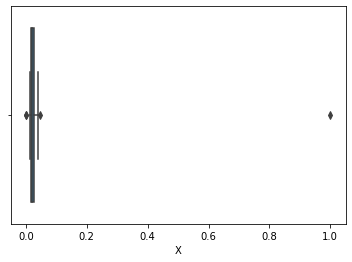

In [221]:
sns.boxplot(df['X'])

In [222]:
# Y : Standard scaler
df['Y'].shape

(20,)

In [223]:
new_y_arr = np.array(df['Y'])
new_y_arr = new_y_arr.reshape(-1,1)
print(new_y_arr)

[[1927. ]
 [2300. ]
 [3487.5]
 [5959. ]
 [3487.5]
 [4594. ]
 [1927. ]
 [2879. ]
 [3487.5]
 [4096. ]
 [6730. ]
 [   0. ]
 [2792. ]
 [2575. ]
 [4959. ]
 [1927. ]
 [4580. ]
 [5869. ]
 [4178. ]
 [3487.5]]


In [224]:
y_scaler = preprocessing.StandardScaler()
df['Y'] = y_scaler.fit_transform(new_y_arr)
print(df['Y'])

0    -1.032297
1    -0.796808
2    -0.047098
3     1.513248
4    -0.047098
5     0.651475
6    -1.032297
7    -0.431265
8    -0.047098
9     0.337070
10    2.000008
11   -2.248880
12   -0.486191
13   -0.623191
14    0.881912
15   -1.032297
16    0.642636
17    1.456428
18    0.388840
19   -0.047098
Name: Y, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


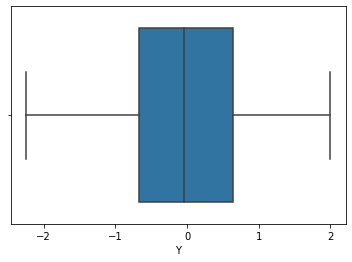

In [225]:
sns.boxplot(df['Y'])

✈

Remove outliner

In [226]:
#Q1, Q3, of X
q1 = df['X'].quantile(0.25)
q3 = df['X'].quantile(0.75)
iqr = q3 - q1

#Q1, Q3, of Y
q1_y = df['Y'].quantile(0.25)
q3_y = df['Y'].quantile(0.75)
iqr_y = q3_y - q1_y

In [227]:
print(q1)
print(q3)
print(iqr)
print('-----------')
print(q1_y)
print(q3_y)
print(iqr_y)

0.01825
0.027000000000000003
0.008750000000000004
-----------
-0.6665955302457639
0.6448460241445502
1.311441554390314


In [228]:
print((df['X'] < (q1 - 1.5 * iqr)) |(df['X'] > (q3 + 1.5 * iqr)))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12     True
13    False
14     True
15    False
16    False
17    False
18    False
19     True
Name: X, dtype: bool


In [229]:
print((df['Y'] < (q1_y - 1.5 * iqr_y)) |(df['Y'] > (q3_y + 1.5 * iqr_y)))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Y, dtype: bool


In [230]:
df['X']

0     0.0190
1     0.0195
2     0.0150
3     0.0160
4     0.0160
5     0.0195
6     0.0190
7     0.0200
8     0.0210
9     0.0000
10    0.0195
11    0.0250
12    0.0000
13    0.0330
14    1.0000
15    0.0190
16    0.0360
17    0.0400
18    0.0195
19    0.0450
Name: X, dtype: float64

In [231]:
for i in range(len(df['X'])):
  if (df['X'][i] < (q1 - 1.5 * iqr)) |(df['X'][i] > (q3 + 1.5 * iqr)):
    df.drop(i,inplace=True)


In [232]:
df['X']

0     0.0190
1     0.0195
2     0.0150
3     0.0160
4     0.0160
5     0.0195
6     0.0190
7     0.0200
8     0.0210
10    0.0195
11    0.0250
13    0.0330
15    0.0190
16    0.0360
17    0.0400
18    0.0195
Name: X, dtype: float64

In [233]:
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
df['X']

0     0.0190
1     0.0195
2     0.0150
3     0.0160
4     0.0160
5     0.0195
7     0.0200
8     0.0210
9     0.0195
10    0.0250
11    0.0330
13    0.0360
14    0.0400
15    0.0195
Name: X, dtype: float64

In [234]:
new_arr = np.array(df['X'])
new_arr = new_arr.reshape(-1,1)
print(new_arr)
x_scaler = preprocessing.MinMaxScaler()
df['X'] = x_scaler.fit_transform(new_arr)
print(df['X'])

[[0.019 ]
 [0.0195]
 [0.015 ]
 [0.016 ]
 [0.016 ]
 [0.0195]
 [0.02  ]
 [0.021 ]
 [0.0195]
 [0.025 ]
 [0.033 ]
 [0.036 ]
 [0.04  ]
 [0.0195]]
0     0.16
1     0.18
2     0.00
3     0.04
4     0.04
5     0.18
7     0.20
8     0.24
9     0.18
10    0.40
11    0.72
13    0.84
14    1.00
15    0.18
Name: X, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


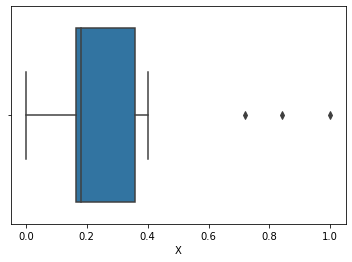

In [235]:
sns.boxplot(df['X'])

In [236]:
#Q1, Q3, of Y
q1_y = df['Y'].quantile(0.25)
q3_y = df['Y'].quantile(0.75)
iqr_y = q3_y - q1_y

In [237]:
print(q1_y)
print(q3_y)
print(iqr_y)

-0.5752097244939295
0.64926537226381
1.2244750967577396


In [238]:
print((df['Y'] < (q1_y - 1.5 * iqr_y)) |(df['Y'] > (q3_y + 1.5 * iqr_y)))

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
Name: Y, dtype: bool


In [239]:
new_y_arr = np.array(df['Y'])
new_y_arr = new_y_arr.reshape(-1,1)
print(new_y_arr)
y_scaler = preprocessing.StandardScaler()
df['Y'] = y_scaler.fit_transform(new_y_arr)
print(df['Y'])

[[-1.03229659]
 [-0.79680847]
 [-0.04709762]
 [ 1.51324793]
 [-0.04709762]
 [ 0.65147505]
 [-0.43126524]
 [-0.04709762]
 [ 2.00000756]
 [-2.24887999]
 [-0.62319122]
 [ 0.64263635]
 [ 1.45642774]
 [ 0.3888395 ]]
0    -1.038373
1    -0.822131
2    -0.133692
3     1.299131
4    -0.133692
5     0.507788
7    -0.486462
8    -0.133692
9     1.746109
10   -2.155528
11   -0.662703
13    0.499672
14    1.246954
15    0.266617
Name: Y, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


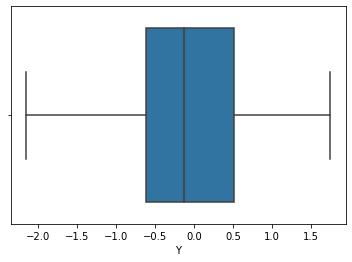

In [240]:
sns.boxplot(df['Y'])

In [248]:
df.reset_index(drop=True,inplace=True)

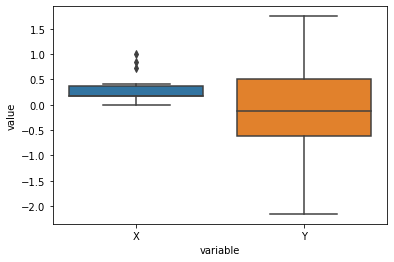

In [249]:
new_df = pd.DataFrame(data=df, columns=['X','Y'])
sns.boxplot(x='variable', y='value', data=pd.melt(new_df))

**1.3: Category Label**

In [250]:
label_enc = preprocessing.LabelEncoder()
df['Z_Category'] = label_enc.fit_transform(df['Z'])
print(df)

#print(df['Z'])

       X         Y     Z  Z_Category  bird  cat  dog
0   0.16 -1.038373   cat           1   0.0  1.0  0.0
1   0.18 -0.822131   dog           2   0.0  0.0  1.0
2   0.00 -0.133692  bird           0   1.0  0.0  0.0
3   0.04  1.299131   cat           1   0.0  1.0  0.0
4   0.04 -0.133692   cat           1   0.0  1.0  0.0
5   0.18  0.507788   dog           2   0.0  0.0  1.0
6   0.20 -0.486462  bird           0   1.0  0.0  0.0
7   0.24 -0.133692  bird           0   0.0  1.0  0.0
8   0.18  1.746109   cat           1   1.0  0.0  0.0
9   0.40 -2.155528  bird           0   0.0  0.0  1.0
10  0.72 -0.662703   dog           2   0.0  0.0  1.0
11  0.84  0.499672   dog           2   0.0  0.0  1.0
12  1.00  1.246954   dog           2   NaN  NaN  NaN
13  0.18  0.266617   dog           2   NaN  NaN  NaN


In [251]:
one_hot_enc = preprocessing.OneHotEncoder()
df_one_hot_enc = pd.DataFrame(one_hot_enc.fit_transform(df[['Z_Category']]).toarray())
print(df_one_hot_enc)

      0    1    2
0   0.0  1.0  0.0
1   0.0  0.0  1.0
2   1.0  0.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  0.0  1.0
6   1.0  0.0  0.0
7   1.0  0.0  0.0
8   0.0  1.0  0.0
9   1.0  0.0  0.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
12  0.0  0.0  1.0
13  0.0  0.0  1.0


In [252]:
df.reset_index(drop=True)
df[['bird', 'cat', 'dog']] = df_one_hot_enc
print(df)

       X         Y     Z  Z_Category  bird  cat  dog
0   0.16 -1.038373   cat           1   0.0  1.0  0.0
1   0.18 -0.822131   dog           2   0.0  0.0  1.0
2   0.00 -0.133692  bird           0   1.0  0.0  0.0
3   0.04  1.299131   cat           1   0.0  1.0  0.0
4   0.04 -0.133692   cat           1   0.0  1.0  0.0
5   0.18  0.507788   dog           2   0.0  0.0  1.0
6   0.20 -0.486462  bird           0   1.0  0.0  0.0
7   0.24 -0.133692  bird           0   1.0  0.0  0.0
8   0.18  1.746109   cat           1   0.0  1.0  0.0
9   0.40 -2.155528  bird           0   1.0  0.0  0.0
10  0.72 -0.662703   dog           2   0.0  0.0  1.0
11  0.84  0.499672   dog           2   0.0  0.0  1.0
12  1.00  1.246954   dog           2   0.0  0.0  1.0
13  0.18  0.266617   dog           2   0.0  0.0  1.0
